In [ ]:
!pip install -U nltk
!pip install -U textblob
!pip install -U wordcloud
!pip install -U plotly

In [80]:
import csv
import pandas as pd
import string
import seaborn as sns

# Convert the Words into Count Vectpr 
from sklearn.feature_extraction.text import CountVectorizer

# Used to Pipe line 
from sklearn.feature_extraction.text import TfidfTransformer

# Train Test Split
from sklearn.model_selection import train_test_split

# Model 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,LinearRegression

# For Report 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

#visual
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# For the Stop Words
# from nltk.corpus import stopwords

import nltk # preprocessing text
from textblob import TextBlob
import string # for finding punctuation in text

In [88]:
import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words

import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style

from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text

# import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
# plotly.tools.set_config_file(world_readable=True, sharing='public')
# remove war
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline

In [5]:
join_BID_tor = pd.read_csv('join_BID_tor.csv')
join_BID_tor_v2 = pd.read_csv('join_BID_tor_v2.csv')
df_restaurant_tor = pd.read_csv('df_restaurant_tor.csv')
df_review_csv_sept = pd.read_csv('df_review_csv_sept.csv')

In [109]:
join_BID_tor_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    20433 non-null  int64  
 1   business_id   20433 non-null  object 
 2   name          20433 non-null  object 
 3   neighborhood  17277 non-null  object 
 4   address       20433 non-null  object 
 5   city          20433 non-null  object 
 6   state         20433 non-null  object 
 7   postal_code   20422 non-null  object 
 8   latitude      20433 non-null  float64
 9   longitude     20433 non-null  float64
 10  stars_x       20433 non-null  float64
 11  review_count  20433 non-null  int64  
 12  is_open       20433 non-null  int64  
 13  categories    20433 non-null  object 
 14  review_id     20433 non-null  object 
 15  user_id       20433 non-null  object 
 16  stars_y       20433 non-null  int64  
 17  date          20433 non-null  object 
 18  text          20433 non-nu

In [9]:
join_BID_tor.describe()

,Unnamed: 0,latitude,longitude,stars_x,review_count,is_open,stars_y,useful,funny,cool
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,10216.000000,43.677076,-79.390625,3.718837,147.329076,0.995106,3.653061,0.665688,0.214408,0.425635
std,5898.643361,0.046402,0.048237,0.581681,209.044149,0.069788,1.301382,2.928769,1.619727,2.601176
min,0.000000,43.594146,-79.663413,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5108.000000,43.649047,-79.411469,3.500000,31.000000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,10216.000000,43.656917,-79.392424,4.000000,77.000000,1.000000,4.000000,0.000000,0.000000,0.000000
75%,15324.000000,43.677909,-79.378927,4.000000,180.000000,1.000000,5.000000,0.000000,0.000000,0.000000
max,20432.000000,43.876501,-79.137178,5.000000,1494.000000,1.000000,5.000000,63.000000,49.000000,62.000000


In [15]:
df_review_csv_sept.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
Year           0
month          0
length         0
dtype: int64

In [10]:
join_BID_tor.isnull().sum()

Unnamed: 0         0
business_id        0
name               0
neighborhood    3156
address            0
city               0
state              0
postal_code       11
latitude           0
longitude          0
stars_x            0
review_count       0
is_open            0
categories         0
review_id          0
user_id            0
stars_y            0
date               0
text               0
useful             0
funny              0
cool               0
dtype: int64

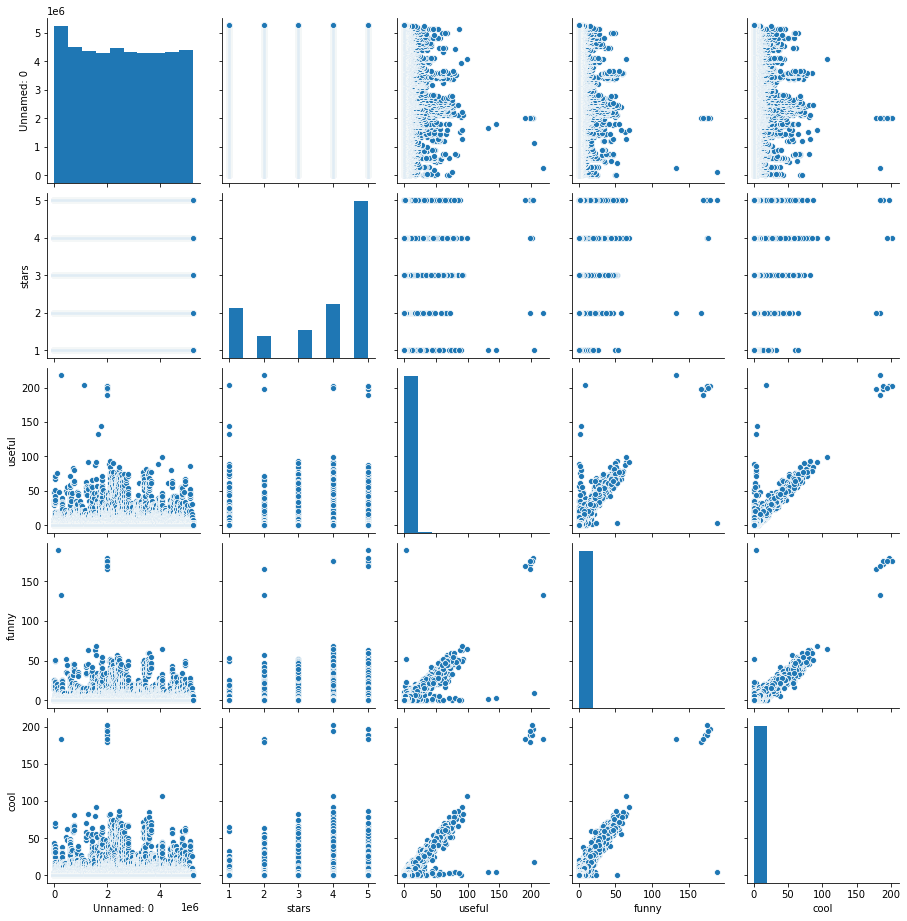

In [19]:
sns.pairplot(df_review_csv_sept)

In [8]:
df_review_csv_sept["stars"].value_counts()

5    165461
4     56871
1     52910
3     29077
2     22747
Name: stars, dtype: int64

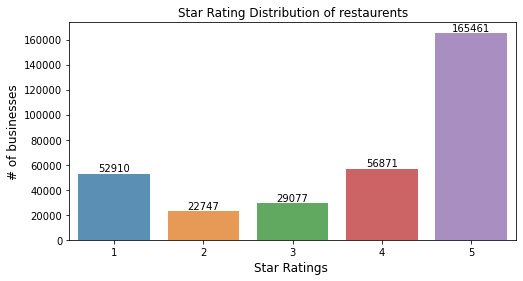

In [19]:
#Get the distribution of the ratings
x=df_review_csv_sept['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution of restaurents")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [22]:
most_review = (join_BID_tor_v2.groupby(['city', 'stars_y']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   .drop_duplicates(subset='stars_y'))
most_review

,city,stars_y,count
0,Toronto,5,6645
1,Toronto,4,6249
2,Toronto,3,3491
3,Toronto,1,2147
4,Toronto,2,1901


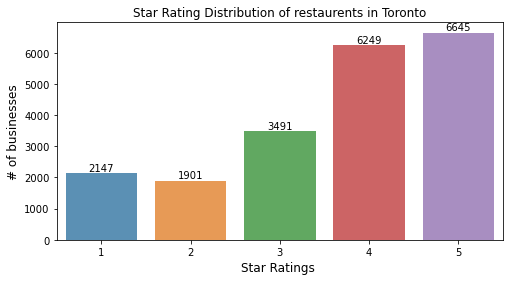

In [33]:
#Get the distribution of the ratings
x=join_BID_tor_v2['stars_y'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution of restaurents in Toronto")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [21]:
join_BID_tor_v2["FSA"].value_counts()

M5V    2222
M5T    1737
M6J    1170
M5G     917
M2N     840
       ... 
M6L       2
V0J       2
L4K       1
L4W       1
M2L       1
Name: FSA, Length: 104, dtype: int64

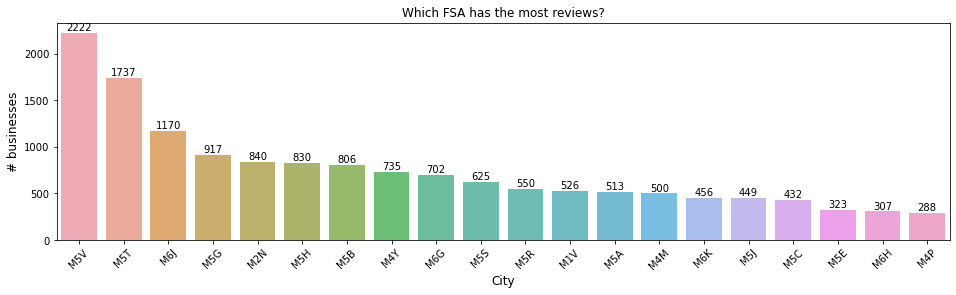

In [15]:
#Get the distribution of the ratings
x = join_BID_tor_v2['FSA'].value_counts()
x = x.sort_values(ascending = False)
x = x.iloc[0:20]
plt.figure(figsize = (16,4))
ax = sns.barplot(x.index, x.values, alpha = 0.8)
plt.title("Which FSA has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation = 45)
plt.ylabel('# businesses', fontsize = 12)
plt.xlabel('City', fontsize = 12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [23]:
most_review_FSA = (join_BID_tor_v2.groupby(['FSA', 'stars_y']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') 
   .drop_duplicates(subset='stars_y'))
most_review_FSA

,FSA,stars_y,count
0,M5V,5,735
1,M5V,4,669
5,M5V,3,384
15,M5V,2,233
20,M5V,1,201


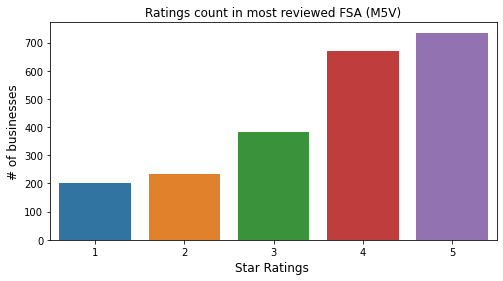

In [48]:
#Get the distribution of the ratings
# x=join_BID_tor_v2["FSA"].value_counts()
# x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
sns.barplot(x=most_review_FSA["stars_y"], y=most_review_FSA["count"], data=most_review_FSA)
plt.title("Ratings count in most reviewed FSA (M5V)")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

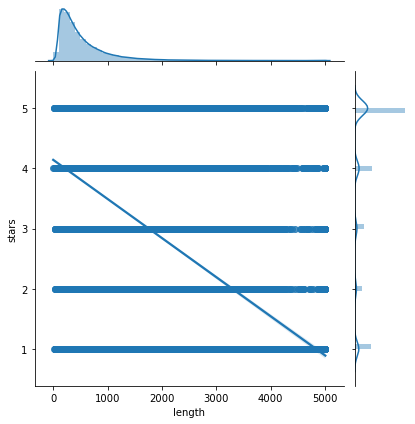

In [15]:
# The longer the text the lower the star rating

import matplotlib.pyplot as plt

df_review_csv_sept["length"] = df_review_csv_sept["text"].apply(len)
sns.jointplot(x=df_review_csv_sept["length"],
              y=df_review_csv_sept["stars"],
              data=df_review_csv_sept, kind='reg')

In [94]:
df_restaurant_tor.name.value_counts().index[:20].tolist()

['"Starbucks"',
 '"Tim Hortons"',
 '"McDonald\'s"',
 '"Subway"',
 '"Second Cup"',
 '"Pizza Pizza"',
 '"Swiss Chalet Rotisserie & Grill"',
 '"Aroma Espresso Bar"',
 '"LCBO"',
 '"Pizzaiolo"',
 '"Tim Horton\'s"',
 '"Freshii"',
 '"Popeyes Louisiana Kitchen"',
 '"Wild Wing"',
 '"Pizza Nova"',
 '"DAVIDsTEA"',
 '"Domino\'s Pizza"',
 '"The Second Cup"',
 '"Thai Express"',
 '"Booster Juice"']

In [103]:
most_reviewed = pd.DataFrame(df_restaurant_tor['name'].value_counts()[:20])

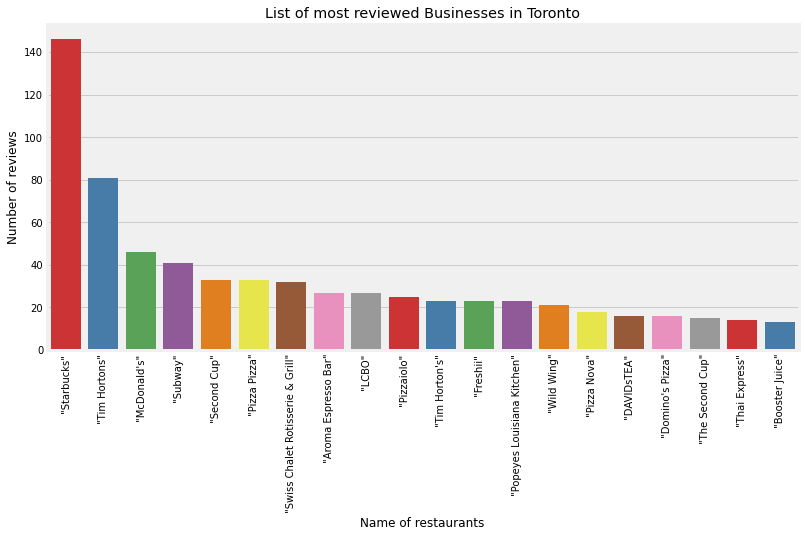

In [104]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=most_reviewed.index, y=most_reviewed['name'], palette = 'Set1')
plt.title('List of most reviewed Businesses in Toronto');
plt.ylabel('Number of reviews', fontsize=12)
plt.xlabel('Name of restaurants', fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

In [117]:
from datetime import datetime
join_BID_tor_v2['date'] = pd.to_datetime(join_BID_tor_v2['date'], format='%Y%m%d')

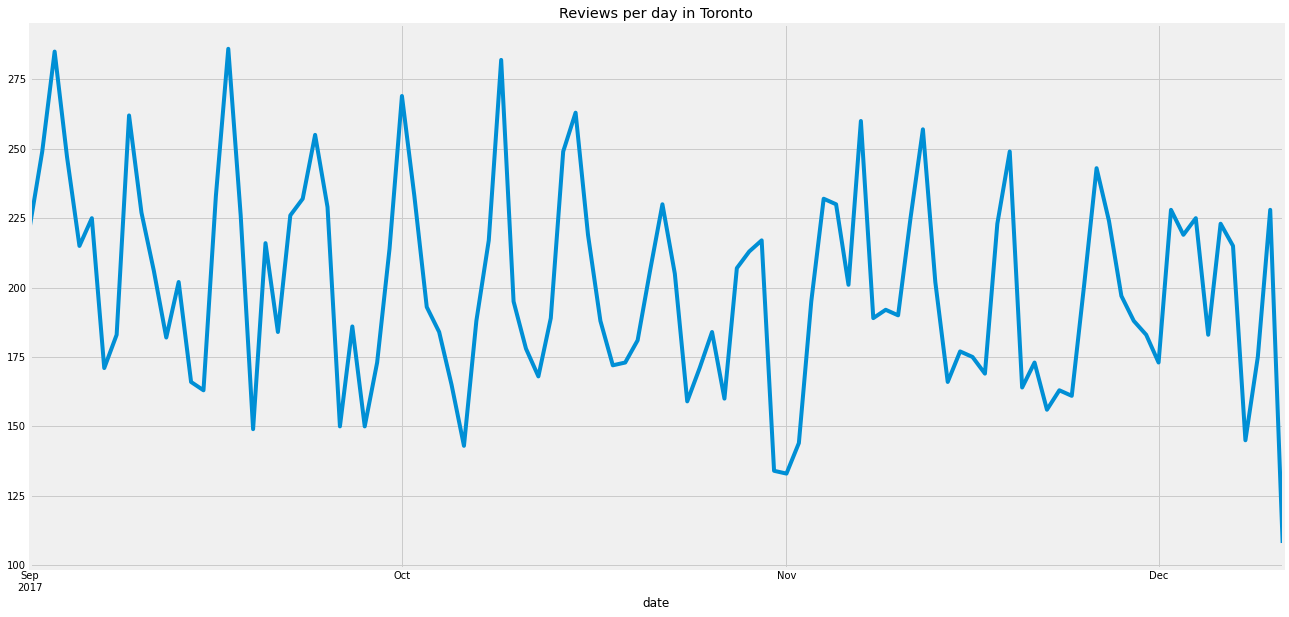

In [118]:
grp_date = join_BID_tor_v2.groupby(['date'])['business_id'].count()

ts = pd.Series(grp_date)
ts.plot(kind='line', figsize=(20,10),title='Reviews per day in Toronto')
plt.show()


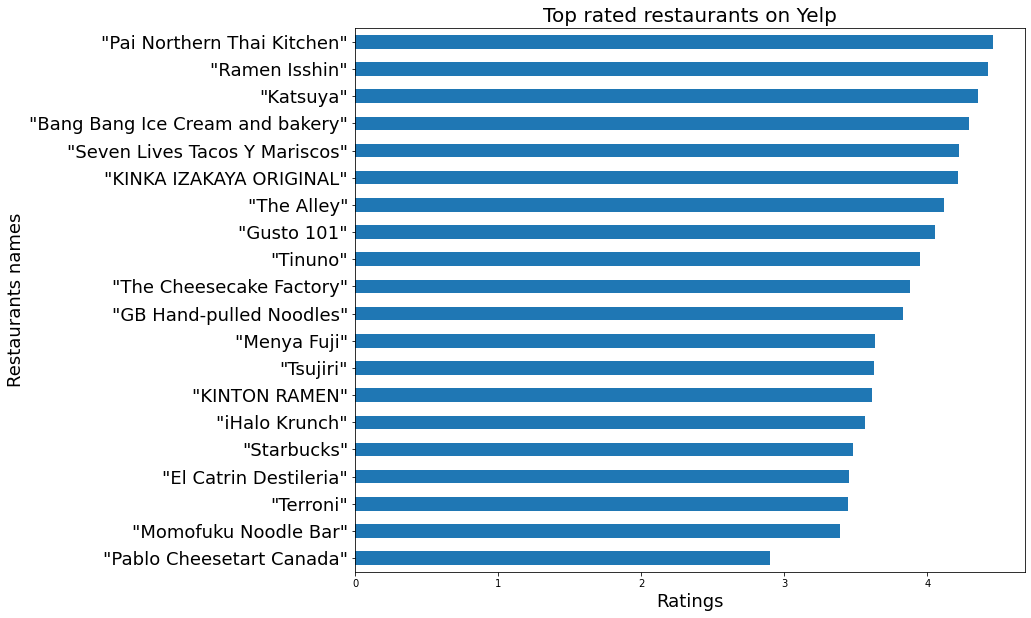

In [76]:
df_review_csv_sept['name'] = df_review_csv_sept['business_id'].map(df_restaurant_tor.set_index('business_id')['name'])
# take the top only 20 most occurances restaurants for analysis. Because the dataset has over thousand business id. It will be really inefficient if we take all of the business name
top_restaurants = df_review_csv_sept.name.value_counts().index[:20].tolist()
# create a new dataframe called 'df_review_top' that only contains the reviews of 'top_restaurants'
df_review_top = df_review_csv_sept.loc[df_review_csv_sept['name'].isin(top_restaurants)]
# now we take the name column and count mean of stars of each unique business name (I am using pandas groupby function for this. If you don't know what pandas groupby function does, please search on Google)
# then sort values in ascending order 
# then plot the graph
df_review_top.groupby(df_review_top.name)['stars'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))

plt.yticks(fontsize=18)
plt.title('Top rated restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)

plt.show()

In [89]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
df_review_top['text_clear'] = df_review_top['text'].apply(preprocess)

def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

df_review_top['senti_polarity'] = df_review_top['text_clear'].apply(sentiment)

In [90]:
# filter Pai
df_Pai_only = df_restaurant_tor.loc[df_restaurant_tor['name'] == '"Pai Northern Thai Kitchen"']
# filter reviews for only Pai
df_Pai_review = df_review_csv_sept.loc[df_review_csv_sept['business_id'].isin(df_Pai_only.business_id)]

# clear the text
df_Pai_review['text_clear'] = df_Pai_review['text'].apply(preprocess)

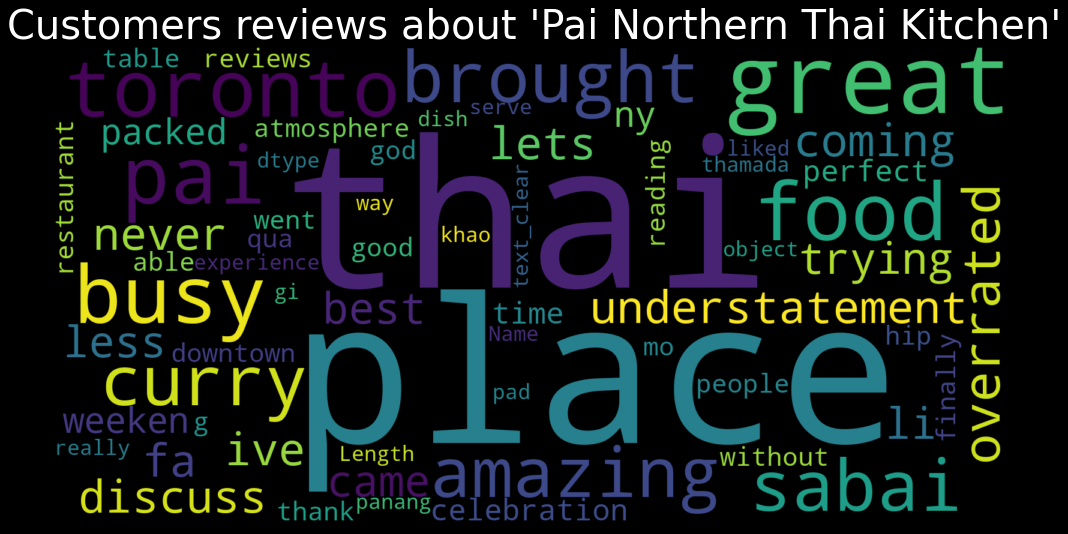

In [93]:
# difine wordcloud function from wordcloud library.
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud
wc.generate(str(df_Pai_review['text_clear']))
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Customers reviews about 'Pai Northern Thai Kitchen'", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of configuration finally plot the graph
plt.show()

In [62]:
# top users
user_agg=df_review_csv_sept.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [63]:
# top users between sept-dec 2017
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("Top 10 Users in Yelp")
user_agg.head(10)

Top 10 Users in Yelp


review_id        date             useful funny  cool  \
                           count         min         max    sum   sum   sum   
user_id                                                                       
2pVj1Hid6_Iq3Th9xI0aOQ       112  2017-10-02  2017-11-18     46     3    30   
KBoIRjxSW7OWczv8OS9Bew       106  2017-09-03  2017-12-10     54    12    22   
bLbSNkLggFnqwNNzzq-Ijw        88  2017-09-01  2017-12-11   1781   803  1252   
Vf0hOeEgyN7ba1WOnUxBQQ        87  2017-09-04  2017-12-10     37     7    15   
hazFjLv3rVO_9V9wSQ55Gw        86  2017-09-01  2017-12-05     83    15    57   
keBv05MsMFBd0Hu98vXThQ        83  2017-09-01  2017-12-08    113     3   128   
6YmRpoIuiq8I19Q8dHKTHw        82  2017-09-07  2017-12-10      8     2     7   
9pNcdrQLWWrX0vEGGJlEbg        81  2017-09-03  2017-12-06    157    31    72   
1zak35bVariWhWPN3mANPw        81  2017-09-01  2017-12-10      8     0     1   
qKpkRCPk4ycbllTfFcRbNw        80  2017-09-01  2017-12-10     15     3     8   

                           stars  
                            mean  
user_id                           
2pVj1Hid6_Iq3Th9xI0aOQ  3.955357  
KBoIRjxSW7OWczv8OS9Bew  3.915094  
bLbSNkLggFnqwNNzzq-Ijw  3.613636  
Vf0hOeEgyN7ba1WOnUxBQQ  4.655172  
hazFjLv3rVO_9V9wSQ55Gw  3.360465  
keBv05MsMFBd0Hu98vXThQ  4.855422  
6YmRpoIuiq8I19Q8dHKTHw  4.536585  
9pNcdrQLWWrX0vEGGJlEbg  3.864198  
1zak35bVariWhWPN3mANPw  3.172840  
qKpkRCPk4ycbllTfFcRbNw  3.400000

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


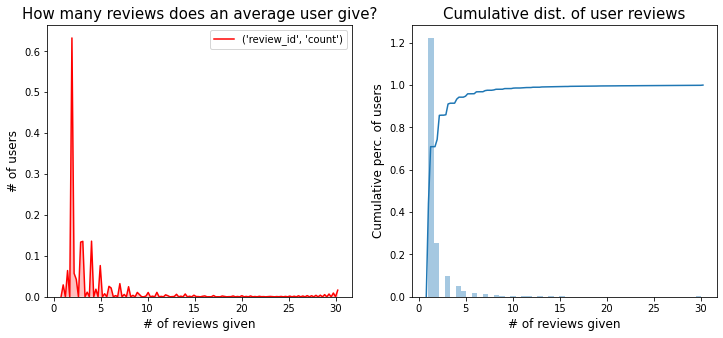

In [65]:
# Cap max reviews to 30 for better visuals
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,5))

gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
#Cumulative Distribution
ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
plt.title("How many reviews does an average user give?",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.distplot(user_agg[('review_id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative dist. of user reviews",fontsize=15)
plt.ylabel('Cumulative perc. of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()

In [2]:

# bag of words
class PreProcessText(object):
    def __init__(self):
        pass
    
    def __remove_punctuation(self, text):
        """
        Takes a String 
        return : Return a String 
        """
        message = []
        for x in text:
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        
        return message
    
    def __remove_stopwords(self, text):
        """
        Takes a String
        return List
        """
        words= []
        for x in text.split():

            if x.lower() in stopwords.words('english'):
                pass
            else:
                words.append(x)
        return words
    
    
    def token_words(self,text=''):
        """
        Takes String
        Return Token also called  list of words that is used to 
        Train the Model 
        """
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words

In [14]:
#df_review_csv_sept = df_review_csv_sept[(df_review_csv_sept["stars"]==1) | (df_review_csv_sept["stars"]==5)]
X_Data = df_review_csv_sept["text"]
Y_Data = df_review_csv_sept["stars"]

cv = CountVectorizer()
X_Data = cv.fit_transform(X_Data)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)
model = MultinomialNB()
model.fit(X_Train,Y_Train)
predicted = model.predict(X_Test)
print(classification_report(Y_Test, predicted))

              precision    recall  f1-score   support

           1       0.67      0.75      0.71     15907
           2       0.31      0.23      0.27      6781
           3       0.37      0.30      0.33      8732
           4       0.40      0.63      0.49     16983
           5       0.87      0.72      0.79     49717

    accuracy                           0.64     98120
   macro avg       0.52      0.53      0.52     98120
weighted avg       0.67      0.64      0.65     98120



In [37]:

df_review_csv_sept = df_review_csv_sept[(df_review_csv_sept["stars"]==1) | (df_review_csv_sept["stars"]==5)]
X_Data = df_review_csv_sept["text"]
Y_Data = df_review_csv_sept["stars"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data,test_size=0.3,random_state=101)



pipe = Pipeline([('bow',CountVectorizer()),
                 ('tfidf',TfidfTransformer()),
                 ('model', MultinomialNB())])
pipe.fit(X_Train,Y_Train)
predict = pipe.predict(X_Test)
print(classification_report(Y_Test, predict))

              precision    recall  f1-score   support

           1       0.97      0.70      0.81     15873
           5       0.91      0.99      0.95     49639

    accuracy                           0.92     65512
   macro avg       0.94      0.85      0.88     65512
weighted avg       0.93      0.92      0.92     65512



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split